# İlk embedding’iniz

## Egzersiz hedefleri:

- NLP için ilk RNN'nizi çalıştırın
- Gömme kavramının ne olduğunu ilk kez deneyimleyin

<hr>

Kelimeler, sinir ağına kolayca besleyebileceğiniz şeyler değildir. Bu nedenle, onları daha anlamlı bir şeye dönüştürmemiz gerekir. 

Ve _Embeddings_ kavramı tam da bunun için vardır! Herhangi bir kelimeyi vektörel bir temsil üzerine eşler (bu, her kelimeyi bir vektörle temsil etmenin süslü bir yoludur ;) ). Örneğin, `köpek` kelimesi gömme uzayında $(w_1, w_2, ..., w_n)$ vektörü ile temsil edilebilir ve biz de $(w_k)_k$ ağırlıklarını öğreniriz.

Öyleyse haydi başlayalım.

# Data

❓ **Soru** ❓ Öncelikle verileri yükleyelim. Fonksiyonda neler olduğunu anlamanıza gerek yok, burada önemi yok.

⚠️ **Uyarı** ⚠️ `load_data` fonksiyonunun bir `percentage_of_sentences` argümanı vardır. Bilgisayarınıza bağlı olarak, çok fazla cümle bilgisayarınızı yavaşlatabilir veya hatta dondurabilir - RAM'iniz taşabilir. Bu nedenle, **cümlelerin %10'uyla başlamalı** ve bilgisayarınızın bunu kaldırabildiğini görmelisiniz. Aksi takdirde, daha düşük bir sayı ile yeniden çalıştırın. 

⚠️ **DISCLAIMER** ⚠️ **_En büyüğü kimde_ (RAM) oyununu oynamaya gerek yok!** Buradaki amaç, modellerinizi hızlı bir şekilde çalıştırarak prototip oluşturmaktır. Gerçek hayatta bile, hızlı bir şekilde döngü ve hata ayıklama yapmak için verilerinizin bir alt kümesiyle başlamanız önerilir. Bu nedenle, yalnızca en iyi doğruluğu elde etmek istiyorsanız sayıyı artırın. 

In [1]:
#####################################################
### Verileri yüklemek için bu hücreyi çalıştırın  ###
#####################################################

import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import text_to_word_sequence

def load_data(percentage_of_sentences=10):
    train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], batch_size=-1, as_supervised=True)

    train_sentences, y_train = tfds.as_numpy(train_data)
    test_sentences, y_test = tfds.as_numpy(test_data)

    # Tüm verilerin yalnızca belirli bir yüzdesini alın
    if percentage_of_sentences is not None:
        assert(percentage_of_sentences> 0 and percentage_of_sentences<=100)

        len_train = int(percentage_of_sentences/100*len(train_sentences))
        train_sentences, y_train = train_sentences[:len_train], y_train[:len_train]

        len_test = int(percentage_of_sentences/100*len(test_sentences))
        test_sentences, y_test = test_sentences[:len_test], y_test[:len_test]

    X_train = [text_to_word_sequence(_.decode("utf-8")) for _ in train_sentences]
    X_test = [text_to_word_sequence(_.decode("utf-8")) for _ in test_sentences]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data(percentage_of_sentences=10)

2026-02-14 23:27:53.167556: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-14 23:27:53.393991: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-14 23:27:53.718696: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-02-14 23:27:54.253737: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-02-14 23:27:54.255672: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-02-14 23:27:54.793161: I tensorflow/core/platform/cpu_feature_guard.cc:

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /home/wit/tensorflow_datasets/imdb_reviews/plain_text/incomplete.2U9M6J_1.0.0/imdb_reviews-train.tfr…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /home/wit/tensorflow_datasets/imdb_reviews/plain_text/incomplete.2U9M6J_1.0.0/imdb_reviews-test.tfre…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /home/wit/tensorflow_datasets/imdb_reviews/plain_text/incomplete.2U9M6J_1.0.0/imdb_reviews-unsupervi…

Dataset imdb_reviews downloaded and prepared to /home/wit/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


Verileri yüklediğinize göre, şimdi bir göz atalım!

❓ **Soru** ❓ Burada verilerle oynayabilirsiniz. Özellikle, `X_train` ve `X_test` cümle listeleridir. Bunlardan bazılarını, `y_train` ve `y_test` içinde saklanan ilgili etiketleriyle birlikte yazdırın.

# Tokenları Tekrar birleştirip okuyoruz.

In [2]:
for i in range(5):
    sentence = " ".join(X_train[i])
    label = "Pozitif" if y_train[i] == 1 else "Negatif"

    print(f"Örnek {i+1}")
    print("Cümle:", sentence[:300], "...")  # çok uzun olmasın diye
    print("Etiket:", label)
    print("-" * 50)


Örnek 1
Cümle: this was an absolutely terrible movie don't be lured in by christopher walken or michael ironside both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece t ...
Etiket: Negatif
--------------------------------------------------
Örnek 2
Cümle: i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the sette and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly ...
Etiket: Negatif
--------------------------------------------------
Örnek 3
Cümle: mann photographs the alberta rocky mountains in a superb fashion and jimmy stewart and walter brennan give enjoyable performances as they always seem to do br br but come on hollywood a mountie telling the peopl

In [3]:
for i in range(3):
    sentence = " ".join(X_test[i])
    label = "Pozitif" if y_test[i] == 1 else "Negatif"

    print(f"Test Örneği {i+1}")
    print("Cümle:", sentence[:300], "...")
    print("Etiket:", label)
    print("-" * 50)


Test Örneği 1
Cümle: there are films that make careers for george romero it was night of the living dead for kevin smith clerks for robert rodriguez el mariachi add to that list onur tukel's absolutely amazing ding a ling less flawless film making and as assured and as professional as any of the aforementioned movies i  ...
Etiket: Pozitif
--------------------------------------------------
Test Örneği 2
Cümle: a blackly comic tale of a down trodden priest nazarin showcases the economy that luis bunuel was able to achieve in being able to tell a deeply humanist fable with a minimum of fuss as an output from his mexican era of film making it was an invaluable talent to possess with little money and extremel ...
Etiket: Pozitif
--------------------------------------------------
Test Örneği 3
Cümle: scary movie 1 4 epic movie date movie meet the spartans not another teen movie and another gay movie making superhero movie the eleventh in a series that single handily ruined the parody genre 

Cümleler gerçekten yorum mu?

Çok mu uzunlar?

Etiketler mantıklı mı?

Tokenizasyon nasıl görünüyor?

**ETİKETLER**: Görev bir ikili sınıflandırma problemidir:
- etiket 0️⃣ <font color=red>negatif</font> film yorumuna karşılık gelir
- etiket 1️⃣ <font color=green>pozitif</font> film yorumuna karşılık gelir

**GİRDİLER**:
- 🧹 Veri kısmen temizlenmiştir! Bu yüzden bu egzersizde bununla ilgilenmenize gerek yok.
- ❗️ Ancak gerçek hayattaki çalışmalarda bu adımı unutmamalısınız.

Kelimelerin bilgisayarlar için doğrudan uygun olmadığını hatırlıyor musunuz?  
Onları **tokenize** etmeniz gerekir!

❓ **Soru** ❓ Aşağıdaki hücreyi çalıştırarak cümlelerinizi tokenize edin

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Bu, tüm tokenizasyonu sizin için yapan bir Keras yardımcı programını başlatır.
tokenizer = Tokenizer()

# Tokenizasyon, bir tokeni (integer) her kelimeye eşleyen bir sözlüğü öğrenir.
# Bu, yalnızca eğitim setinde yapılabilir - test setini bilmemiz gerekmez!
# Bu tokenizasyon ayrıca kelimelerinizi küçük harfe çevirir, bazı filtreler uygular vb. - isterseniz dokümanı kontrol edebilirsiniz.
tokenizer.fit_on_texts(X_train)

# Tokenizasyonu eğitim ve test setine uygularız.
X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

❓ **Soru** ❓ Beklediğiniz sonucu aldığınızdan emin olmak için tokenize edilmiş cümlelerin bazılarını yazdırın.

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [6]:
# İlk 3 cümleyi token'lara çevirip yazdıralım
sequences = tokenizer.texts_to_sequences(X_train)

for i in range(3):
    print(f"Cümle {i+1}")
    print("Orijinal:", X_train[i])
    print("Tokenlar :", sequences[i])
    print("-" * 50)


Cümle 1
Orijinal: ['this', 'was', 'an', 'absolutely', 'terrible', 'movie', "don't", 'be', 'lured', 'in', 'by', 'christopher', 'walken', 'or', 'michael', 'ironside', 'both', 'are', 'great', 'actors', 'but', 'this', 'must', 'simply', 'be', 'their', 'worst', 'role', 'in', 'history', 'even', 'their', 'great', 'acting', 'could', 'not', 'redeem', 'this', "movie's", 'ridiculous', 'storyline', 'this', 'movie', 'is', 'an', 'early', 'nineties', 'us', 'propaganda', 'piece', 'the', 'most', 'pathetic', 'scenes', 'were', 'those', 'when', 'the', 'columbian', 'rebels', 'were', 'making', 'their', 'cases', 'for', 'revolutions', 'maria', 'conchita', 'alonso', 'appeared', 'phony', 'and', 'her', 'pseudo', 'love', 'affair', 'with', 'walken', 'was', 'nothing', 'but', 'a', 'pathetic', 'emotional', 'plug', 'in', 'a', 'movie', 'that', 'was', 'devoid', 'of', 'any', 'real', 'meaning', 'i', 'am', 'disappointed', 'that', 'there', 'are', 'movies', 'like', 'this', 'ruining', "actor's", 'like', 'christopher', "walken'

Her kelimeyi bir token ile eşleştiren sözlüğe `tokenizer.word_index` ile erişilebilir.

❓ **Soru** ❓ Eğitim setindeki farklı kelimelerin (=tokenlerin) sayısını depolayan bir `vocab_size` değişkeni ekleyin. Buna _sözcük dağarcığının boyutu_ (_size of the vocabulary_) denir.

In [7]:
vocab_size = len(tokenizer.word_index)
vocab_size

30419

Pratikte doğru kullanım (önerilen)

Embedding ve padding kullanacağın için genelde +1 eklenir:

vocab_size = len(tokenizer.word_index) + 1


Neden?

tokenizer.word_index → index’ler 1’den başlar

0 → padding için ayrılır

Embedding layer index error vermesin diye

`X_train_token` ve `X_test_token` farklı uzunluklarda diziler içerir.

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/06-DL/NLP/padding.png" alt='Padding example' width="700px" />

Ancak, bir sinir ağı girdi olarak bir tensör içermelidir. Bu nedenle, verilerinizi doldurmanız gerekir.

❓ **Soru** ❓  Verilerinizi `pad_sequences` işleviyle doldurun (belgeler [burada](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences)). `dtype` ve `padding` anahtar kelimelerini unutmayın (ancak burada `maxlen` kullanmayın).

In [8]:
# Gerekli fonksiyonu import et
from tensorflow.keras.preprocessing.sequence import pad_sequences

# X_train_token ve X_test_token:
# - Her biri farklı uzunluklarda integer (token) dizileri içerir
# - Sinir ağları sabit boyutlu tensör ister
# Bu yüzden padding uyguluyoruz

# Eğitim verisini pad et
X_train_padded = pad_sequences(
    X_train_token,      # Tokenize edilmiş eğitim cümleleri
    padding="post",     # Kısa dizilerin SONUNA 0 ekle
    dtype="int32"       # TensorFlow için uygun veri tipi
)

# Test verisini pad et
X_test_padded = pad_sequences(
    X_test_token,       # Tokenize edilmiş test cümleleri
    padding="post",     # Eğitim ile tutarlı olsun
    dtype="int32"       # Embedding layer için gerekli
)

# Kontrol amaçlı: oluşan tensör boyutları
print(X_train_padded.shape)
print(X_test_padded.shape)


(2500, 1164)
(2500, 988)


Bu noktada:

✔️ Tüm cümleler aynı uzunlukta

✔️ Modelin beklediği tensör formatı hazır

✔️ Bir sonraki adım: Embedding layer


# RNN

Şimdi bu verileri Tekrarlayan Sinir Ağına aktaralım.

❓ **Soru** ❓ Aşağıdakileri içeren bir model yazın:
- `input_dim` değeri kelime dağarcığınızın boyutu (= `vocab_size`) olan ve `output_dim` değeri istediğiniz gömme alanının boyutu olan bir gömme katmanı
- bir RNN (SimpleRNN, LSTM, GRU) katmanı
- bir Yoğun katman
- bir çıktı katmanı

⚠️ **Uyarı** ⚠️ Burada maskeleme katmanına ihtiyacınız yoktur. Neden? Çünkü `layers.Embedding` bunu doğrudan yapmak için bir argümana sahiptir ve bunu `mask_zero=True` ile ayarlamanız gerekir. Bu aynı zamanda verilerinizin **0** ile doldurulması **GEREKTİĞİ** anlamına gelir (bu varsayılan davranıştır). Bunun `input_dim`'i nasıl **etkilediğini** anlamak için [belgelere](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding#example_2) bakın.

<details>
    <summary>💡İpucu</summary>

`input_dim` kelime dağarcığının büyüklüğü + 1'e eşit olmalıdır

</details>

Uygun argümanlarla derleyin.

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

# =============================
# HYPERPARAMETRELER
# =============================

embedding_dim = 128   # Gömme (embedding) vektör boyutu
rnn_units = 64        # LSTM hücre sayısı

# vocab_size:
# tokenizer.word_index uzunluğu + 1
# +1 -> padding (0) için
# vocab_size değişkeninin daha önce tanımlı olduğu varsayılıyor

# =============================
# MODEL TANIMI
# =============================

model = models.Sequential()

# 1️⃣ Embedding katmanı
model.add(
    layers.Embedding(
        input_dim=vocab_size,                         # kelime dağarcığı + 1
        output_dim=embedding_dim,                      # embedding boyutu
        input_shape=(X_train_padded.shape[1],),       # 👈 modeli build eder
        mask_zero=True                                 # padding (0) otomatik maskelenir
    )
)

# 2️⃣ RNN katmanı (LSTM)
model.add(
    layers.LSTM(
        rnn_units
    )
)

# 3️⃣ Yoğun (Dense) katman
model.add(
    layers.Dense(
        32,
        activation="relu"
    )
)

# 4️⃣ Çıktı katmanı (binary classification)
model.add(
    layers.Dense(
        1,
        activation="sigmoid"
    )
)

# =============================
# MODEL DERLEME
# =============================

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


❓ **Soru** ❓ RNN'nizdeki parametre sayısına bakın. 

In [17]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 1164, 128)      │     3,893,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,945,153 (15.05 MB)

 Trainable params: 3,945,153 (15.05 MB)

 Non-trainable params: 0 (0.00 B)

❓ Gömme katmanınızdaki parametre sayısının (kelime dağarcığınızdaki kelime sayısı + maskeleme değeri için 1) $\times$ gömme boyutunuzla eşit olduğunu iki kez kontrol edin.

In [18]:
print("Beklenen :", 3,893,632 )
print("Modelden :", model.layers[0].count_params())



Beklenen : 3 893 632
Modelden : 3893632


❓ **Soru** ❓ Modelinizi 20 dönemle ve sabır değeri 4 olan erken durdurma kriteriyle uyumlaştırmaya başlayın.

⚠️ **Uyarı** ⚠️ Bunun çok zaman aldığını görebilirsiniz! 

**Bu yüzden birkaç yinelemeden sonra durdurun!**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping




Ekrana bakarak veya kahve içerek çok fazla zaman kaybetmeyelim. Ara vermeye başlamak için henüz çok erken ;)

❓ **Soru** ❓ Hesaplama süresini kısaltacağız. Başlangıç olarak, trai
n setinizin farklı cümlelerinde kaç kelime olduğunu görelim (aşağıdaki hücreyi çalıştırın).

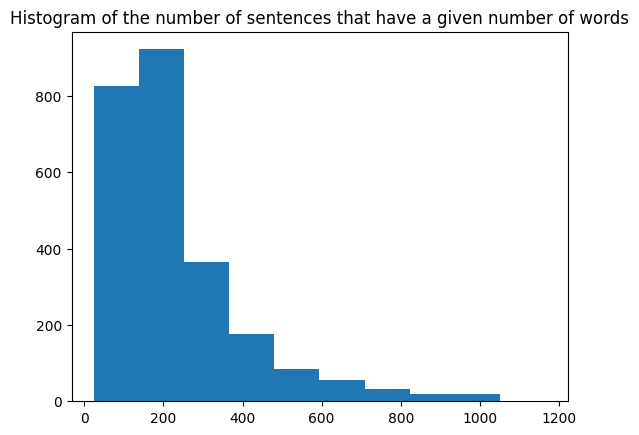

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hist(X):
    len_ = [len(_) for _ in X]
    plt.hist(len_)
    plt.title('Histogram of the number of sentences that have a given number of words')
    plt.show()

plot_hist(X_train)


Muhtemelen cümlelerinizin %90 ila %95'inin 300 kelimeden az olduğunu göreceksiniz. Ve çok azı 1000 kelimeden fazladır.

Ancak, yukarıdaki dolguda `maxlen` kullanmadığınız için, girdi tensörünüzün boyutu, en fazla kelimeye sahip cümlenin uzunluğuna eşittir.

Şimdi, bunun dolguyu nasıl etkilediğine bakalım: 


<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/06-DL/NLP/tensor_size.png" alt='Dimensions of the tensor' width="700px" />

Birkaç çok uzun cümle nedeniyle, tensörünüzün bir boyutu yaklaşık 1000'e eşittir. Ancak, ~200 kelimelik cümlelerin çoğu, işe yaramayan dolgu değerlerine sahiptir.

Dolayısıyla, tensörünüz çoğunlukla işe yaramayan bilgilerden oluşur ve bu da eğitim sürecine zaman ekler.

Peki, verileri maksimum uzunluk (`maxlen`) olarak örneğin 200 (kelime) olacak şekilde doldurursanız ne olur?
- İlk olarak, bu yakınsamayı artıracak ve algoritmanın yakınsamayı beklerken ekrana bakmanıza gerek kalmayacaktır.
- Ancak esasen, gerçekten bu kadar çok bilgiyi kaybediyor musunuz? Bir cümlenin olumlu mu olumsuz mu olduğunu anlamak için genellikle 200 kelimeden (1000'e kadar) fazlasına ihtiyaç duyduğunuzu düşünüyor musunuz?

❓ **Soru** ❓ Tüm bu nedenlerden dolayı, `maxlen` anahtar kelimesini kullanarak dolguyu yeniden yapın ve modeli yeniden eğitin!  Performansı düşürmeden, şimdi ne kadar hızlı olduğunu görün ;)

In [26]:
vocab_size = len(tokenizer.word_index) + 1
print("Vocab size:", vocab_size)


Vocab size: 30420


In [27]:
max_token = max([max(seq) for seq in X_train_token])
print("Max token index in training set:", max_token)


Max token index in training set: 30419


In [28]:
from tensorflow.keras import layers, models

embedding_dim = 128
rnn_units = 64
maxlen = 200  # önceki padding ile aynı olmalı

model = models.Sequential([
    layers.Embedding(
        input_dim=vocab_size,  # 👈 tokenizer ile birebir eşleşmeli
        output_dim=embedding_dim,
        input_length=maxlen,   # maxlen ile eşleşmeli
        mask_zero=True         # 0 ile dolgu kullanılıyor
    ),
    layers.LSTM(rnn_units),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/home/wit/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_padded = pad_sequences(X_train_token, maxlen=maxlen, padding='post', dtype='int32')
X_test_padded  = pad_sequences(X_test_token,  maxlen=maxlen, padding='post', dtype='int32')


In [30]:
history = model.fit(
    X_train_padded,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 261ms/step - accuracy: 0.5730 - loss: 0.6824 - val_accuracy: 0.7180 - val_loss: 0.6277
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 307ms/step - accuracy: 0.8365 - loss: 0.3924 - val_accuracy: 0.8060 - val_loss: 0.4207
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 299ms/step - accuracy: 0.9705 - loss: 0.0987 - val_accuracy: 0.8160 - val_loss: 0.5386
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.9875 - loss: 0.0394 - val_accuracy: 0.7660 - val_loss: 0.7783
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 341ms/step - accuracy: 0.9855 - loss: 0.0431 - val_accuracy: 0.7680 - val_loss: 0.6981
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 398ms/step - accuracy: 0.9960 - loss: 0.0109 - val_accuracy: 0.7940 - val_loss: 0.7847


In [32]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 200, 128)       │     3,893,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,835,845 (45.15 MB)

 Trainable params: 3,945,281 (15.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,890,564 (30.10 MB)

🏁 Harika, artık `Tokenizer` ve `pad_sequences` kullanabilirsiniz.

💾 Not defterinizi git add/commit/push yapmayı unutmayın...

🚀 ... ve bir sonraki göreve geçin!